## Exploratory Data Analysis

https://www.kaggle.com/code/imoore/intro-to-exploratory-data-analysis-eda-in-python



Milestone 2 is simple. You are asked to report the answer to your first research question (if you have only one member per RQ, then you should update the progress for each RQ) We expect that data exploration is completed at this stage. 

Your report will be judged on the progress of your project given the number of members available for the task. 

If you are asked to modify your research questions in milestone 1, you must report your updated research questions in milestone 2. 

You just need to add one section named Milestone 2 Report in your proposal (in overleaf) and generate a pdf file for submission. In this new section, describe: 

1) If your research questions have been updated from the proposal. What's your new research questions?

2) Describe if your methodology has been updated since milestone 1 (proposal) and how. 

3) Describe your current results, e.g., finding from data exploration, answer to research questions 1. 

4) Update the member contribution section based on progress so far.


# Listings.csv

This .csv file contains:

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib
import matplotlib.pyplot as plt             #visualisation
import os
from sklearn import preprocessing 

%matplotlib inline     
sns.set(color_codes=True)

In [67]:
# PD Parameters

pd.set_option('display.float_format', lambda x: '%.2f' % x)
# pd.set_option('display.max_rows', 120)

In [68]:
# Read data

# Change root path as required
rootPathThomas = "C:\\Users\\User\\Desktop\\Data Airbnb"
rootPathThomasDesktop = "C:\\Users\\thoma\\Desktop\\Data Airbnb"

dfListings = pd.read_csv(os.path.join(rootPathThomas, "listings.csv"))

In [69]:
dfListings.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,198258,https://www.airbnb.com/rooms/198258,20231210055232,2023-12-10,city scrape,Rental unit in Barking · ★4.74 · 1 bedroom · 1...,NaN,"I live in Barking town centre, at one time the...",https://a0.muscache.com/pictures/airflow/Hosti...,967537,...,4.88,4.45,4.68,NaN,f,1,0,1,0,0.27
1,33332,https://www.airbnb.com/rooms/33332,20231210055232,2023-12-10,city scrape,"Home in St Margaret's, Isleworth · ★4.40 · 1 ...",NaN,Peaceful and friendly.,https://a0.muscache.com/pictures/miso/Hosting-...,144444,...,4.53,4.68,4.26,NaN,f,2,0,2,0,0.12
2,42010,https://www.airbnb.com/rooms/42010,20231210055232,2023-12-10,city scrape,Home in East Finchley · ★4.88 · 1 bedroom · 1 ...,NaN,We have a unique cinema called the Phoenix whi...,https://a0.muscache.com/pictures/airflow/Hosti...,157884,...,4.95,4.73,4.87,NaN,t,2,0,2,0,3.45
3,284603,https://www.airbnb.com/rooms/284603,20231210055232,2023-12-11,previous scrape,Rental unit in London · ★4.83 · 1 bedroom · 1 ...,NaN,NaN,https://a0.muscache.com/pictures/3246231/8e9b1...,1481851,...,5.00,5.00,4.83,NaN,f,1,1,0,0,0.04
4,89870,https://www.airbnb.com/rooms/89870,20231210055232,2023-12-10,city scrape,Rental unit in London · ★4.65 · 1 bedroom · 1 ...,NaN,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,...,4.91,4.73,4.50,NaN,f,3,2,1,0,0.89


In [70]:
# Datatype modification so 'date' is datetime, 'price', and 'adjusted_price' are float64

dfListings['last_scraped'] = pd.to_datetime(dfListings['last_scraped'])
dfListings['host_acceptance_rate'] = dfListings['host_acceptance_rate'].replace('%', '', regex=True).astype(float)
dfListings['price'] = dfListings['price'].replace('[$,]', '', regex=True).astype(float)

# dfCalendar['price'] = dfCalendar['price'].replace('[$,]', '', regex=True).astype(float)
# dfCalendar['adjusted_price'] = dfCalendar['adjusted_price'].replace('[$,]', '', regex=True).astype(float)
# dfCalendar['available_int'] = dfCalendar['available'].replace({'t': 1, 'f': 0})

print(dfListings.dtypes)

id                                                       int64
listing_url                                             object
scrape_id                                                int64
last_scraped                                    datetime64[ns]
source                                                  object
                                                     ...      
calculated_host_listings_count                           int64
calculated_host_listings_count_entire_homes              int64
calculated_host_listings_count_private_rooms             int64
calculated_host_listings_count_shared_rooms              int64
reviews_per_month                                      float64
Length: 75, dtype: object


In [71]:
dfListings.info()

dfListings.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91778 entries, 0 to 91777
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            91778 non-null  int64         
 1   listing_url                                   91778 non-null  object        
 2   scrape_id                                     91778 non-null  int64         
 3   last_scraped                                  91778 non-null  datetime64[ns]
 4   source                                        91778 non-null  object        
 5   name                                          91778 non-null  object        
 6   description                                   0 non-null      float64       
 7   neighborhood_overview                         48999 non-null  object        
 8   picture_url                                   91767 non-null  obje

,count,mean,min,25%,50%,75%,max,std
id,91778.00,408649389746605440.00,13913.00,23370947.75,52501707.00,878777720826181120.00,1042340593530943872.00,438393073291083776.00
scrape_id,91778.00,20231210055232.00,20231210055232.00,20231210055232.00,20231210055232.00,20231210055232.00,20231210055232.00,0.00
last_scraped,91778,2023-12-10 17:11:49.424916224,2023-12-10 00:00:00,2023-12-10 00:00:00,2023-12-11 00:00:00,2023-12-11 00:00:00,2023-12-25 00:00:00,NaN
description,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,91778.00,165687782.86,4775.00,22604674.00,84236066.00,279510081.00,550101907.00,175655771.31
host_acceptance_rate,66085.00,83.53,0.00,78.00,96.00,100.00,100.00,25.71
host_listings_count,91773.00,43.34,1.00,1.00,2.00,7.00,2475.00,242.50
host_total_listings_count,91773.00,86.19,1.00,1.00,3.00,11.00,5516.00,525.28
neighbourhood_group_cleansed,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,91778.00,51.51,51.30,51.48,51.51,51.54,51.68,0.05


In [72]:
# Null Values count throughout dataset
dfListings.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               24123
Length: 75, dtype: int64

In [73]:
# Remove columns with too many empty columns.
dfListings = dfListings.drop(['neighbourhood_group_cleansed',
                              'description',
                              'license',
                              'bathrooms',
                              'calendar_updated',
                              'bedrooms',
                              'listing_url',
                              'source',
                              'name',
                              'neighborhood_overview',
                              'picture_url',
                              'host_url',
                              'host_name',
                              'host_location',
                              'host_about',
                              'host_thumbnail_url',
                              'host_picture_url',
                              'host_neighbourhood',
                              'host_verifications',
                              'host_has_profile_pic',
                              'latitude',
                              'longitude',
                              'property_type',
                              'room_type',
                              'bathrooms_text',
                              'amenities',
                              'minimum_minimum_nights',
                              'maximum_minimum_nights',
                              'minimum_maximum_nights',
                              'maximum_maximum_nights',
                              'minimum_nights_avg_ntm',
                              'maximum_nights_avg_ntm'], axis=1)
dfListings.head(5)

,id,scrape_id,last_scraped,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,198258,20231210055232,2023-12-10,967537,2011-08-14,within an hour,100%,75.00,f,1.00,...,4.80,4.88,4.45,4.68,f,1,0,1,0,0.27
1,33332,20231210055232,2023-12-10,144444,2010-06-14,NaN,NaN,NaN,f,2.00,...,4.58,4.53,4.68,4.26,f,2,0,2,0,0.12
2,42010,20231210055232,2023-12-10,157884,2010-07-04,within a few hours,100%,100.00,t,2.00,...,4.96,4.95,4.73,4.87,t,2,0,2,0,3.45
3,284603,20231210055232,2023-12-11,1481851,2011-12-07,NaN,NaN,100.00,f,1.00,...,5.00,5.00,5.00,4.83,f,1,1,0,0,0.04
4,89870,20231210055232,2023-12-10,54730,2009-11-16,within an hour,90%,85.00,f,3.00,...,4.90,4.91,4.73,4.50,f,3,2,1,0,0.89


In [74]:
# Check if there are duplicate levels

duplicate_rows_dfCalendar = dfListings[dfListings.duplicated()]
print("number of duplicate rows: ", duplicate_rows_dfCalendar.shape)

number of duplicate rows:  (0, 43)


## Outlier Detection

Outlier detection for different attributes is important

<Axes: xlabel='host_acceptance_rate'>

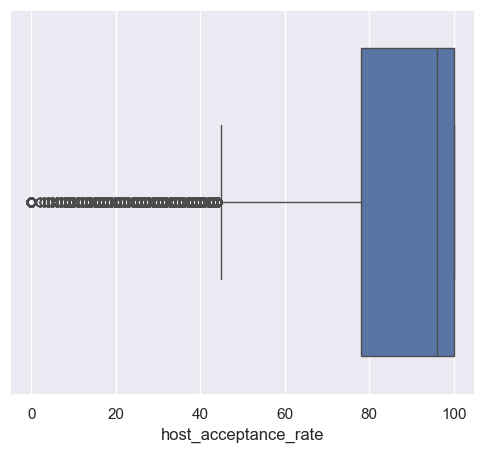

In [75]:
sns.set(rc={"figure.figsize":(6, 5)}) #width=6, height=5

sns.boxplot(data=dfListings['host_acceptance_rate'], orient='h') # .set_xticks([0, 25, 50, 75, 100)

<Axes: xlabel='price'>

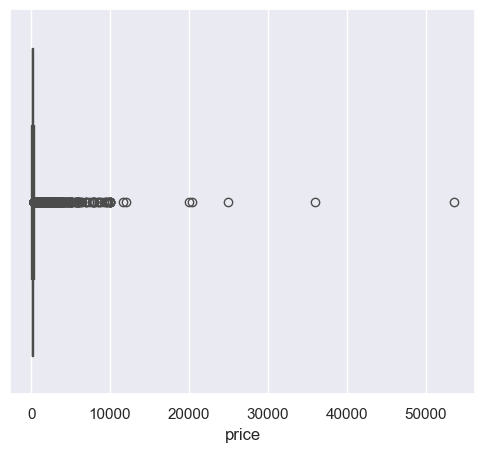

In [76]:
sns.boxplot(x=dfListings['price'])

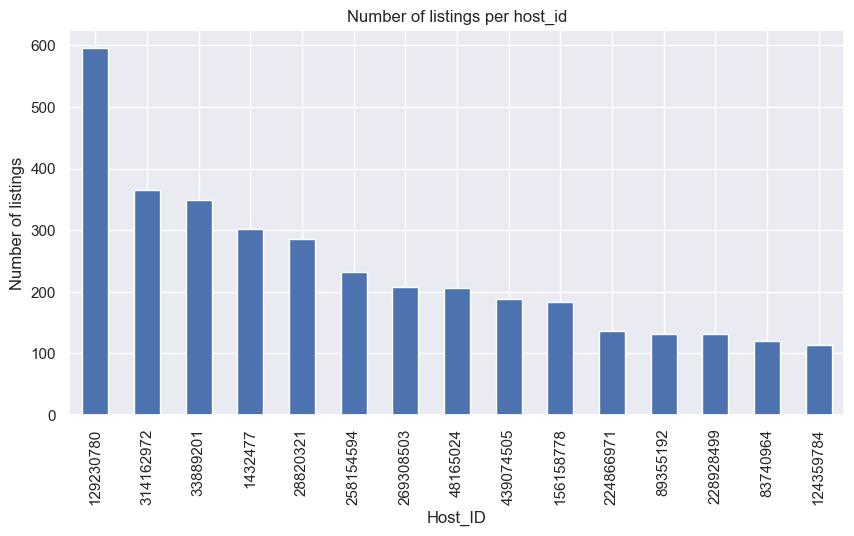

In [77]:
dfListings.host_id.value_counts().nlargest(15).plot(kind='bar', figsize=(10,5))
plt.title("Number of listings per host_id")
plt.ylabel('Number of listings')
plt.xlabel('Host_ID');

In [78]:
dfListings.dtypes

id                                                       int64
scrape_id                                                int64
last_scraped                                    datetime64[ns]
host_id                                                  int64
host_since                                              object
host_response_time                                      object
host_response_rate                                      object
host_acceptance_rate                                   float64
host_is_superhost                                       object
host_listings_count                                    float64
host_total_listings_count                              float64
host_identity_verified                                  object
neighbourhood                                           object
neighbourhood_cleansed                                  object
accommodates                                             int64
beds                                                   

,availability_60
id,0.36
scrape_id,NaN
host_id,0.27
host_acceptance_rate,-0.06
host_listings_count,-0.01
host_total_listings_count,-0.01
accommodates,0.07
beds,0.07
price,0.08
minimum_nights,0.04


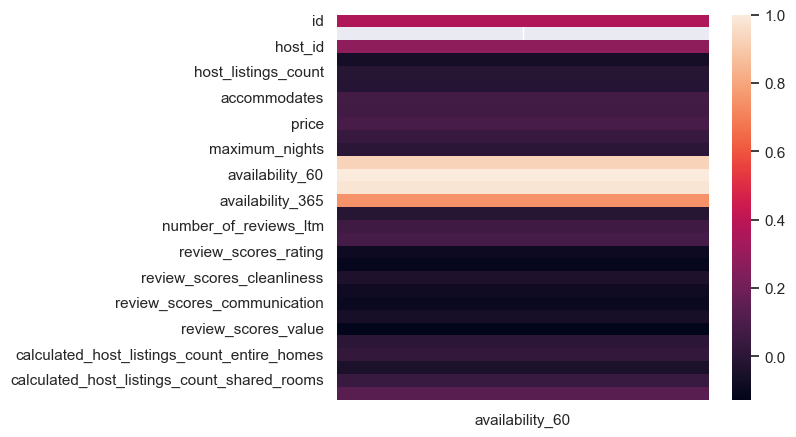

In [79]:
c= dfListings.corr(method='pearson', numeric_only=True)[['availability_60']]
sns.heatmap(c)
c

In [80]:
dfListings = dfListings[dfListings.number_of_reviews != 0]

dfListings.head(1)

,id,scrape_id,last_scraped,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,198258,20231210055232,2023-12-10,967537,2011-08-14,within an hour,100%,75.00,f,1.00,...,4.80,4.88,4.45,4.68,f,1,0,1,0,0.27


In [81]:
# Build unique mappings for certain categorical attributes
label_encoder = preprocessing.LabelEncoder() 

# dfListings['host_response_time'] = label_encoder.fit_transform(dfListings['host_response_time'])

dfListings['host_response_time'] = dfListings['host_response_time'].fillna('N/A')

host_response_time_dict = {'within an hour': 4, 'N/A': 0, 'within a few hours': 3, 'within a day': 2, 'a few days or more': 1}

dfListings.host_response_time.unique()

array(['within an hour', 'N/A', 'within a few hours', 'within a day',
       'a few days or more'], dtype=object)

# EDA For RQ1

Must check to see if there is any information related to customer review scores.

In [82]:
dfListingsReviews = dfListings.filter(['minimum_nights',
                                       'maximum_nights',
                                       'availability_30',
                                       'availability_60',
                                       'availability_90',
                                       'availability_365',
                                       'has_availability',
                                       'number_of_reviews',
                                       'number_of_reviews_l30d',
                                       'review_scores_rating',
                                       'review_scores_accuracy',
                                       'review_scores_cleanliness',
                                       'review_scores_checkin',
                                       'review_scores_communication',
                                       'review_scores_location',
                                       'review_scores_value',
                                       'reviews_per_month']
                                       , axis=1)


dfListingsReviews = dfListingsReviews.dropna(subset=['has_availability'])
dfListingsReviews['has_availability'] = dfListingsReviews['has_availability'].replace({"t": 1, "f": 0})

In [83]:
dfListingsReviews = dfListingsReviews.dropna()
dfListingsReviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66074 entries, 0 to 91777
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   minimum_nights               66074 non-null  int64  
 1   maximum_nights               66074 non-null  int64  
 2   availability_30              66074 non-null  int64  
 3   availability_60              66074 non-null  int64  
 4   availability_90              66074 non-null  int64  
 5   availability_365             66074 non-null  int64  
 6   has_availability             66074 non-null  int64  
 7   number_of_reviews            66074 non-null  int64  
 8   number_of_reviews_l30d       66074 non-null  int64  
 9   review_scores_rating         66074 non-null  float64
 10  review_scores_accuracy       66074 non-null  float64
 11  review_scores_cleanliness    66074 non-null  float64
 12  review_scores_checkin        66074 non-null  float64
 13  review_scores_communi

<Axes: xlabel='review_scores_rating', ylabel='availability_365'>

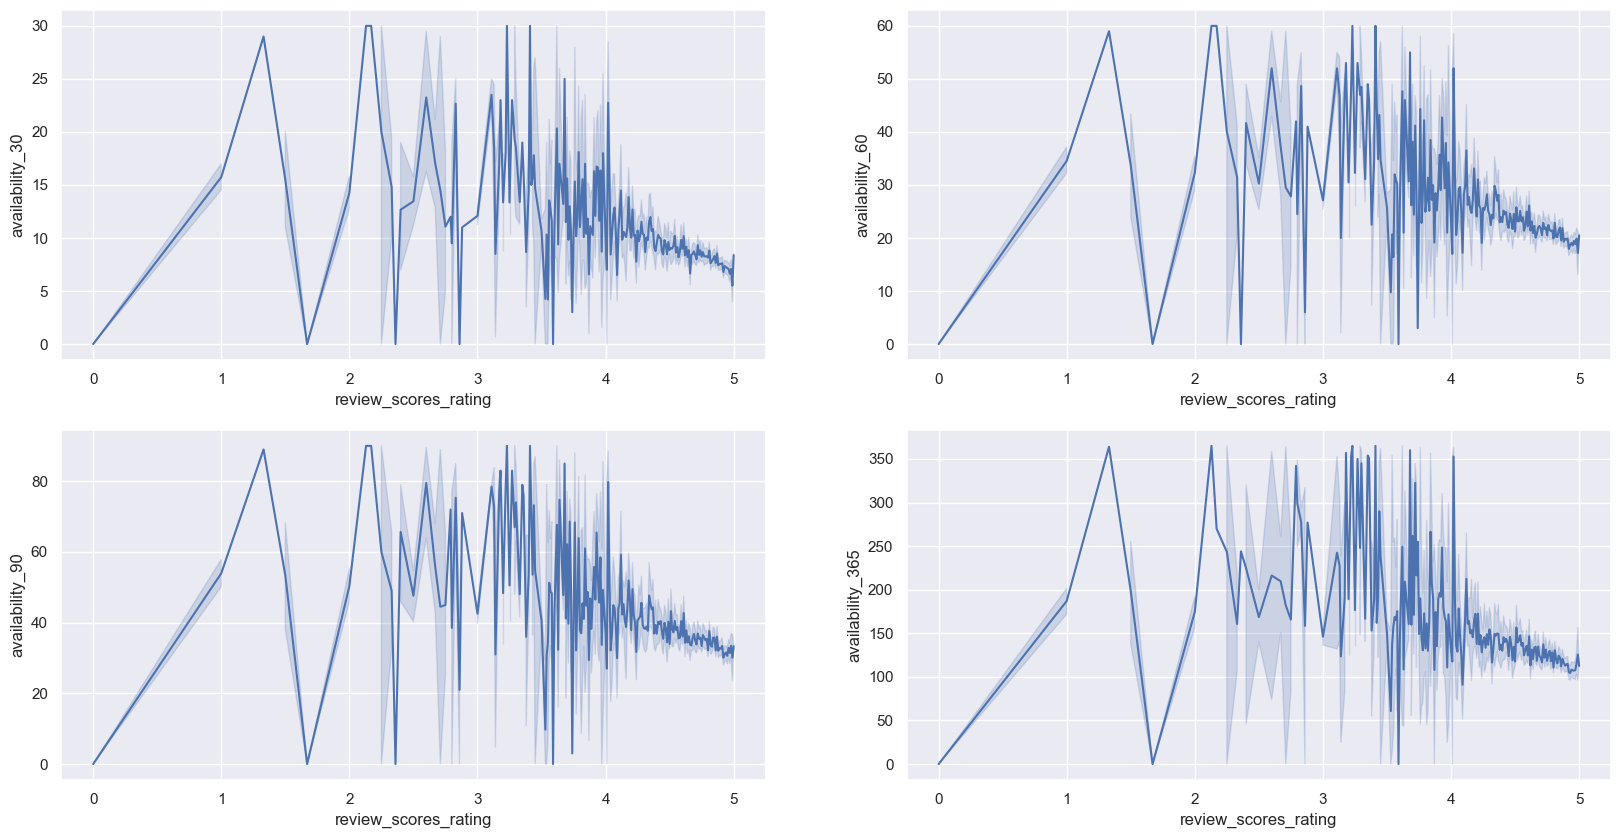

In [84]:
# Univariate Analysis

fig, ax =plt.subplots(2,2, figsize=(20,10))
sns.lineplot(data=dfListingsReviews, x = "review_scores_rating", y="availability_30", ax=ax[0, 0])
sns.lineplot(data=dfListingsReviews, x = "review_scores_rating", y="availability_60", ax=ax[0, 1])
sns.lineplot(data=dfListingsReviews, x = "review_scores_rating", y="availability_90", ax=ax[1, 0])
sns.lineplot(data=dfListingsReviews, x = "review_scores_rating", y="availability_365", ax=ax[1, 1])

<Axes: xlabel='reviews_per_month', ylabel='Count'>

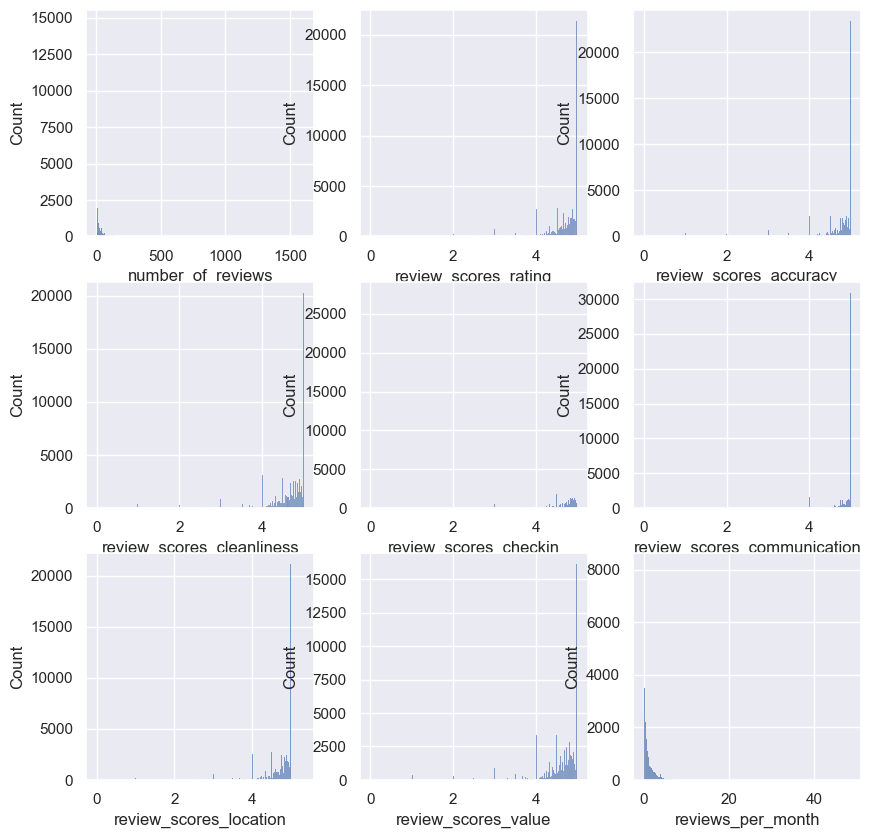

In [85]:
fig, ax =plt.subplots(3,3, figsize=(10,10))

sns.histplot(data=dfListingsReviews, x="number_of_reviews", ax=ax[0,0])
sns.histplot(data=dfListingsReviews, x="review_scores_rating", ax=ax[0,1])
sns.histplot(data=dfListingsReviews, x="review_scores_accuracy", ax=ax[0,2])
sns.histplot(data=dfListingsReviews, x="review_scores_cleanliness", ax=ax[1,0])
sns.histplot(data=dfListingsReviews, x="review_scores_checkin", ax=ax[1,1])
sns.histplot(data=dfListingsReviews, x="review_scores_communication", ax=ax[1,2])
sns.histplot(data=dfListingsReviews, x="review_scores_location", ax=ax[2,0])
sns.histplot(data=dfListingsReviews, x="review_scores_value", ax=ax[2,1])
sns.histplot(data=dfListingsReviews, x="reviews_per_month", ax=ax[2,2])

<Axes: >

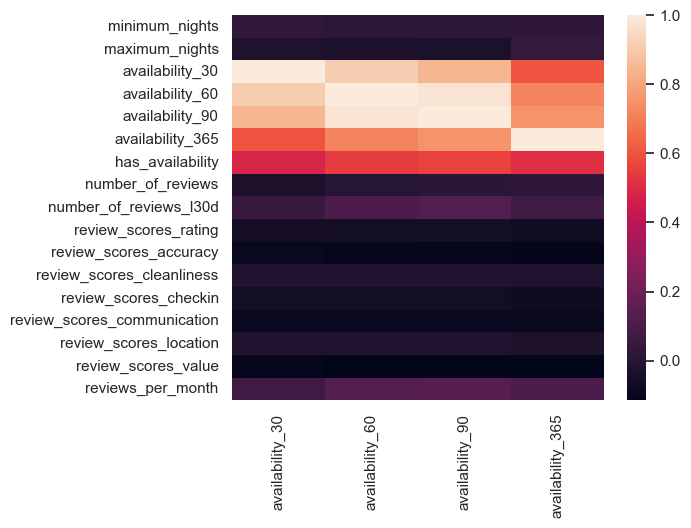

In [86]:
dfListingsHighReviews = dfListingsReviews[(dfListingsReviews['review_scores_accuracy'] > 3) &
                                      (dfListingsReviews['review_scores_checkin'] > 3) &
                                      (dfListingsReviews['review_scores_cleanliness'] > 3) &
                                      (dfListingsReviews['review_scores_communication'] > 3) &
                                      (dfListingsReviews['review_scores_location'] > 3) &
                                      (dfListingsReviews['review_scores_rating'] > 3) &
                                      (dfListingsReviews['review_scores_value'] > 3)]

dfListingsHighReviews.describe().T

c= dfListingsHighReviews.corr(method='pearson', numeric_only=True)[['availability_30', 'availability_60', 'availability_90', 'availability_365']]
sns.heatmap(c)


<Axes: xlabel='availability_365', ylabel='Count'>

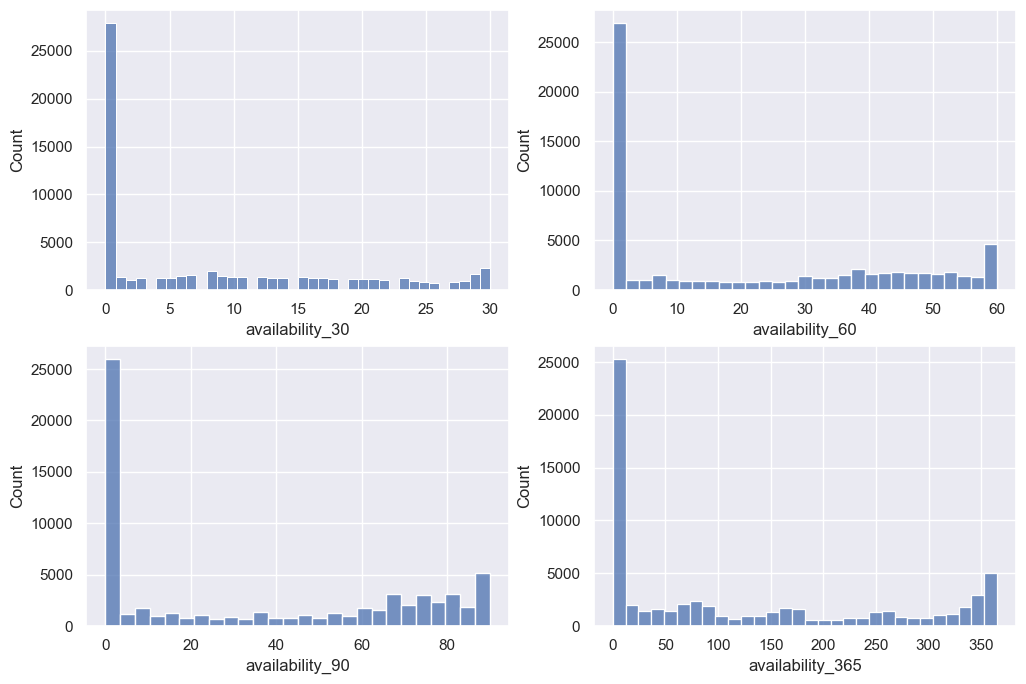

In [87]:
fig, ax =plt.subplots(2,2, figsize=(12,8))

sns.histplot(data=dfListingsReviews, x="availability_30", ax=ax[0,0])
sns.histplot(data=dfListingsReviews, x="availability_60", ax=ax[0,1])
sns.histplot(data=dfListingsReviews, x="availability_90", ax=ax[1,0])
sns.histplot(data=dfListingsReviews, x="availability_365", ax=ax[1,1])


In [88]:
temp30 = dfListingsReviews[dfListingsReviews['availability_30'] == 0]

temp30.describe().T

,count,mean,std,min,25%,50%,75%,max
minimum_nights,27894.00,5.00,19.30,1.00,1.00,2.00,4.00,1124.00
maximum_nights,27894.00,913.74,59873.64,1.00,30.00,365.00,1125.00,10000000.00
availability_30,27894.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
availability_60,27894.00,1.01,4.24,0.00,0.00,0.00,0.00,30.00
availability_90,27894.00,3.23,10.80,0.00,0.00,0.00,0.00,60.00
availability_365,27894.00,26.44,70.53,0.00,0.00,0.00,0.00,335.00
has_availability,27894.00,0.41,0.49,0.00,0.00,0.00,1.00,1.00
number_of_reviews,27894.00,21.30,45.14,1.00,3.00,7.00,20.00,1456.00
number_of_reviews_l30d,27894.00,0.35,1.18,0.00,0.00,0.00,0.00,26.00
review_scores_rating,27894.00,4.70,0.47,0.00,4.60,4.85,5.00,5.00


<Axes: xlabel='reviews_per_month'>

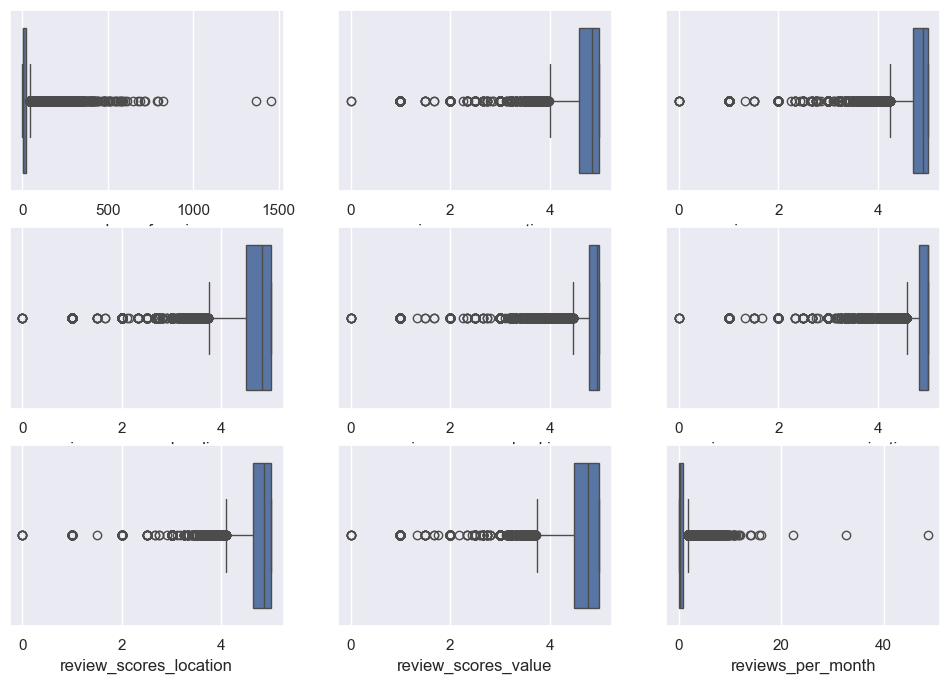

In [89]:
temp30Outliers = temp30[temp30['maximum_nights'] > 365]
temp30Inliers = temp30[temp30['maximum_nights'] <= 365]
tempHighRating = dfListingsReviews[dfListingsReviews['review_scores_rating'] >= 4.5]
temp30LowRating = temp30[temp30['review_scores_rating'] < 4.5]
temp30HighRating = temp30[temp30['review_scores_rating'] >= 4.5]

temp30LowRating.describe().T
tempHighRating.describe().T

fig, ax =plt.subplots(3,3, figsize=(12,8))
sns.boxplot(data=temp30, x="number_of_reviews", ax=ax[0,0])
sns.boxplot(data=temp30, x="review_scores_rating", ax=ax[0,1])
sns.boxplot(data=temp30, x="review_scores_accuracy", ax=ax[0,2])
sns.boxplot(data=temp30, x="review_scores_cleanliness", ax=ax[1,0])
sns.boxplot(data=temp30, x="review_scores_checkin", ax=ax[1,1])
sns.boxplot(data=temp30, x="review_scores_communication", ax=ax[1,2])
sns.boxplot(data=temp30, x="review_scores_location", ax=ax[2,0])
sns.boxplot(data=temp30, x="review_scores_value", ax=ax[2,1])
sns.boxplot(data=temp30, x="reviews_per_month", ax=ax[2,2])